<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/STP_Module_1_Lab_2_Machine_Learning_terms_and_metrics_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, mean_absolute_error,
    mean_squared_error
)

In [15]:
dataset = datasets.fetch_california_housing()

print("=== Dataset Description ===")
print(dataset.DESCR[:1000], "\n...")
rng = np.random.default_rng(seed=42)

=== Dataset Description ===
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. 

In [16]:
print("Original target values:", dataset.target[:10])
dataset.target = dataset.target.astype(int)
X = dataset.data
y = dataset.target

Original target values: [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


In [17]:
print("\nFeature names:", dataset.feature_names)
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Data shape: (20640, 8)
Target shape: (20640,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [20]:
y_pred = NN(X_train, y_train, X_test)
print("\nTest Accuracy (1-NN):", accuracy_score(y_test, y_pred) * 100, "%")


Test Accuracy (1-NN): 35.634689922480625 %


In [21]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [22]:
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel)
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

In [23]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [24]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print("\nNumber of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")


Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [25]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

In [28]:
def print_classification_metrics(true_labels, pred_labels):
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)
    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")
    return accuracy, precision, recall, f1
def print_regression_metrics(true_values, pred_values):
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return mae, mse, rmse

In [29]:
print("\n=== Validation Set Classification Metrics (1-NN) ===")
valpred = NN(traindata, trainlabel, valdata)
print_classification_metrics(vallabel, valpred)


=== Validation Set Classification Metrics (1-NN) ===
Accuracy:  34.11%
Precision: 26.19%
Recall:    24.41%
F1-Score:  25.01%


(np.float64(0.34108527131782945),
 0.2618519014073886,
 0.2440802242008584,
 0.2501492638552703)


=== Confusion Matrix for Validation Set ===


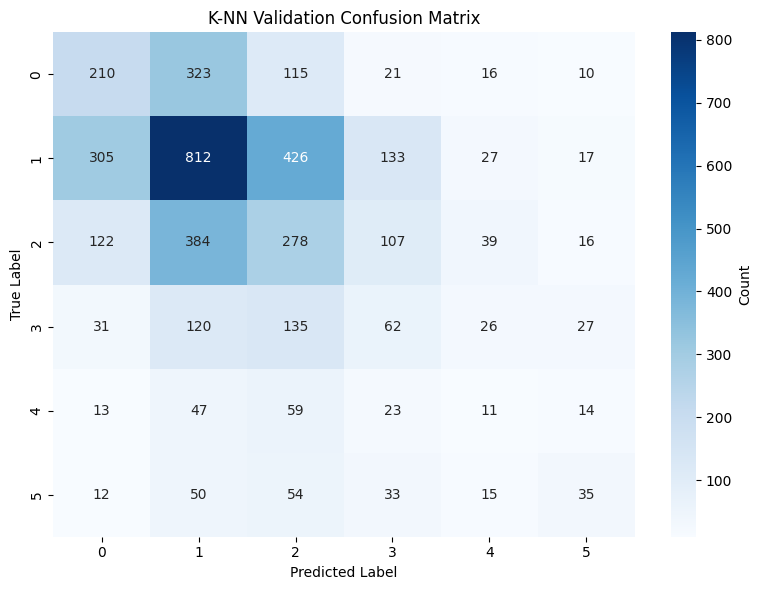

Confusion Matrix Shape: (6, 6)
Total Predictions: 4128


In [30]:
def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    print(f"Confusion Matrix Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")
print("\n=== Confusion Matrix for Validation Set ===")
plot_confusion_matrix(vallabel, valpred, "K-NN Validation Confusion Matrix")

What is the accuracy of our classifiers on the train dataset?

In [31]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("\nTraining accuracy using nearest neighbour:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier:", trainAccuracy*100, "%")


Training accuracy using nearest neighbour: 100.0 %
Training accuracy using random classifier: 16.4375808538163 %


In [32]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("\nValidation accuracy using nearest neighbour:", valAccuracy*100, "%")

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")


Validation accuracy using nearest neighbour: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


In [33]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("\n(Repeat) Validation accuracy using nearest neighbour:", valAccuracy*100, "%")


(Repeat) Validation accuracy using nearest neighbour: 34.048257372654156 %


In [34]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [35]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
print("\nAverage validation accuracy (10 splits):", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)
print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")


Average validation accuracy (10 splits): 33.58463539517022 %
Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

### **1.How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?**
Ans:
When you increase the validation percentage:

The training set gets smaller, so the model has less data to learn from.

The validation set gets larger, so the accuracy estimate becomes more reliable, but often lower because the model is less trained.

When you decrease the validation percentage:

The model has more training data, so it may perform better.

But validation accuracy becomes less stable because the validation set is too small (high variance).


### **2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?**
Ans:
A larger training set helps the model generalize better.

A representative validation set helps us estimate true test performance.

If validation set is too small, you might get over-optimistic or noisy accuracy estimates that don’t match test accuracy.


### **3.What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?**
Ans:
Common default: 80% training / 20% validation.

For smaller datasets (less than 10,000 samples): use 70–30.

For large datasets (50,000+): 90–10 is fine.

Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1-NN
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(alltraindata, alltrainlabel)
testpred1 = knn1.predict(testdata)
acc1 = accuracy_score(testlabel, testpred1)

# 3-NN
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(alltraindata, alltrainlabel)
testpred3 = knn3.predict(testdata)
acc3 = accuracy_score(testlabel, testpred3)

print(f"1-NN Test Accuracy: {acc1*100:.2f}%")
print(f"3-NN Test Accuracy: {acc3*100:.2f}%")


1-NN Test Accuracy: 34.92%
3-NN Test Accuracy: 36.05%


In [42]:
from sklearn.neighbors import KNeighborsClassifier
def NN(traindata, trainlabel, testdata):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(traindata, trainlabel)
    return model.predict(testdata)
def RandomClassifier(traindata, trainlabel, testdata):
    import numpy as np
    unique_labels = np.unique(trainlabel)
    return np.random.choice(unique_labels, size=len(testdata))

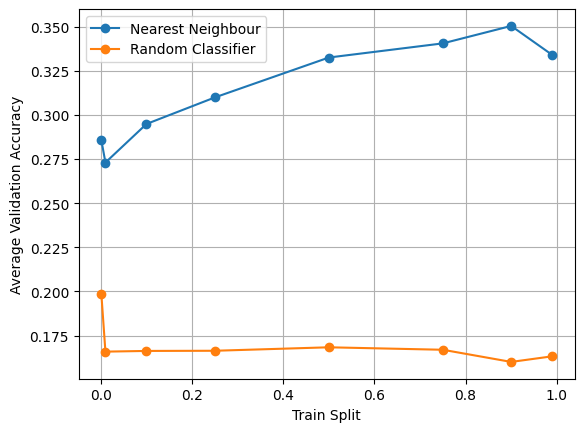

In [43]:
splits = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
nn_acc_split = [AverageAccuracy(alltraindata, alltrainlabel, s, 5, classifier=NN) for s in splits]
rc_acc_split = [AverageAccuracy(alltraindata, alltrainlabel, s, 5, classifier=RandomClassifier) for s in splits]
plt.plot(splits, nn_acc_split, '-o', label='Nearest Neighbour')
plt.plot(splits, rc_acc_split, '-o', label='Random Classifier')
plt.xlabel('Train Split')
plt.ylabel('Average Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()



### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


### **Answers**

1.In a single split:

Accuracy depends on random selection → results vary.
In cross-validation (repeated random splits):

You average multiple results → smoother, more consistent estimate.

2. As iterations increase, variance (fluctuation) in accuracy decreases.

The mean accuracy converges to a stable, realistic estimate of true model performance.

3.  The number of iterations in cross-validation controls how many different random splits of the data you test on.

With more iterations, the accuracy estimate becomes more stable and reliable — random fluctuations due to any particular split average out.

For example:

With 1 iteration → accuracy might vary a lot (e.g., 67%, 73%, 68%…)

With 10 iterations → these differences even out, giving a more consistent estimate (e.g., ~70.5% ± 0.5%)

4. No, not really.
Increasing iterations cannot compensate for too little training data or validation data.

If the train set is too small, the model (especially NN) cannot learn meaningful patterns, so its accuracy remains low — even if you average over many iterations.

If the validation set is too small, the accuracy may vary widely, and while averaging many iterations reduces randomness, it still won’t replace having enough data.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

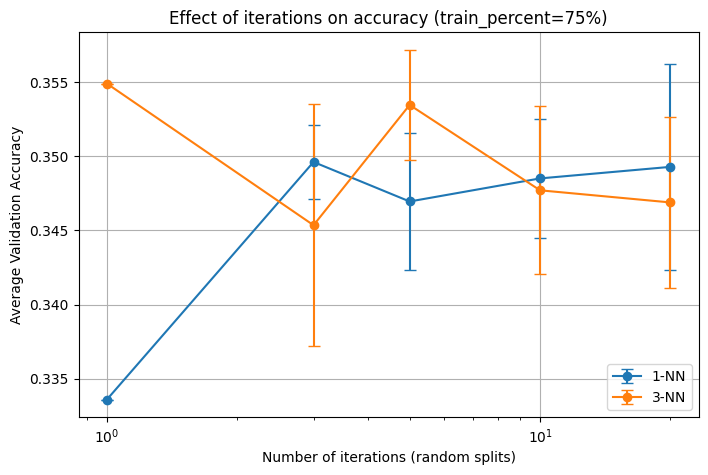

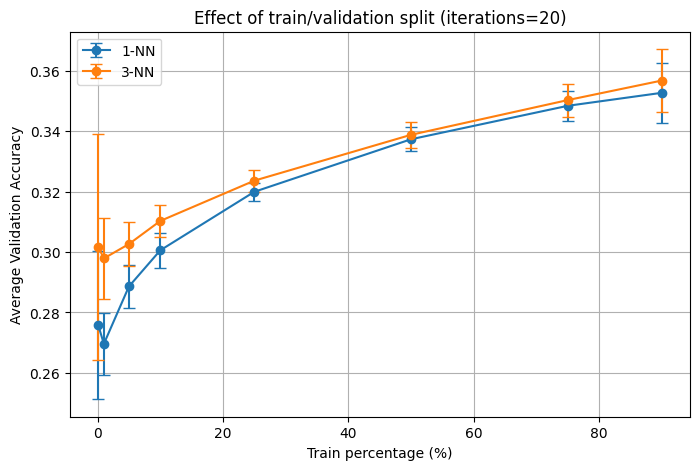

Train% |  1-NN mean±std  |  3-NN mean±std
  0.10 |  27.59% ± 2.46% |  30.18% ± 3.75%
  1.00 |  26.96% ± 1.02% |  29.79% ± 1.34%
  5.00 |  28.86% ± 0.71% |  30.27% ± 0.73%
 10.00 |  30.06% ± 0.58% |  31.03% ± 0.54%
 25.00 |  32.00% ± 0.30% |  32.37% ± 0.37%
 50.00 |  33.74% ± 0.40% |  33.88% ± 0.44%
 75.00 |  34.84% ± 0.50% |  35.03% ± 0.55%
 90.00 |  35.27% ± 0.98% |  35.68% ± 1.04%


In [40]:
rng = np.random.default_rng(42)
dataset = datasets.fetch_california_housing()
X_all = dataset.data
y_all = dataset.target.astype(int)
def random_split(X, y, train_percent):
    n = len(y)
    r = rng.random(n)
    train_mask = r < train_percent
    X_train = X[train_mask]
    y_train = y[train_mask]
    X_val = X[~train_mask]
    y_val = y[~train_mask]
    return X_train, y_train, X_val, y_val
def eval_knn_on_split(X_train, y_train, X_val, y_val, k):
    if len(y_train) == 0 or len(y_val) == 0:
        return np.nan
    clf = KNeighborsClassifier(n_neighbors=k)
    k_use = min(k, max(1, len(y_train)))
    if k_use != k:
        clf = KNeighborsClassifier(n_neighbors=k_use)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return accuracy_score(y_val, y_pred)
def average_accuracy_knn(X, y, train_percent, iterations, k):
    accs = []
    for i in range(iterations):
        X_tr, y_tr, X_val, y_val = random_split(X, y, train_percent)
        acc = eval_knn_on_split(X_tr, y_tr, X_val, y_val, k)
        if not np.isnan(acc):
            accs.append(acc)
    if len(accs) == 0:
        return np.nan, np.nan
    return np.mean(accs), np.std(accs)
split_percents = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
iteration_list = [1, 3, 5, 10, 20]
ks = [1, 3]
train_percent_fixed = 0.75
results_iterations = {k: [] for k in ks}
results_iterations_std = {k: [] for k in ks}

for k in ks:
    for iters in iteration_list:
        mean_acc, std_acc = average_accuracy_knn(X_all, y_all, train_percent_fixed, iters, k)
        results_iterations[k].append(mean_acc)
        results_iterations_std[k].append(std_acc)
plt.figure(figsize=(8,5))
for k in ks:
    plt.errorbar(iteration_list, results_iterations[k], yerr=results_iterations_std[k],
                 marker='o', capsize=4, label=f'{k}-NN')
plt.xscale('log' if max(iteration_list) > 10 else 'linear')
plt.xlabel('Number of iterations (random splits)')
plt.ylabel('Average Validation Accuracy')
plt.title(f'Effect of iterations on accuracy (train_percent={train_percent_fixed*100:.0f}%)')
plt.legend()
plt.grid(True)
plt.show()
iterations_fixed = 20
results_splits = {k: [] for k in ks}
results_splits_std = {k: [] for k in ks}
for k in ks:
    for s in split_percents:
        mean_acc, std_acc = average_accuracy_knn(X_all, y_all, s, iterations_fixed, k)
        results_splits[k].append(mean_acc)
        results_splits_std[k].append(std_acc)
plt.figure(figsize=(8,5))
for k in ks:
    plt.errorbar([p*100 for p in split_percents], results_splits[k], yerr=results_splits_std[k],
                 marker='o', capsize=4, label=f'{k}-NN')
plt.xlabel('Train percentage (%)')
plt.ylabel('Average Validation Accuracy')
plt.title(f'Effect of train/validation split (iterations={iterations_fixed})')
plt.legend()
plt.grid(True)
plt.show()
print("Train% |  1-NN mean±std  |  3-NN mean±std")
for idx, s in enumerate(split_percents):
    m1, sd1 = results_splits[1][idx], results_splits_std[1][idx]
    m3, sd3 = results_splits[3][idx], results_splits_std[3][idx]
    print(f"{s*100:6.2f} | {m1*100:6.2f}% ±{sd1*100:5.2f}% | {m3*100:6.2f}% ±{sd3*100:5.2f}%")
